In [1]:
import numpy as np
np.float = np.float64

import habitat
from habitat.sims.habitat_simulator.actions import HabitatSimActions
from keyboard_agent import KeyboardAgent
from random_movement_agent import RandomMovementAgent
# from custom_sensors import AgentPositionSensor
from habitat_map.mapper import Mapper
from habitat_baselines.config.default import get_config
import os

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
class HabitatRunner():
    def __init__(self):
        # Initialize ROS node and take arguments
        task_config = '/root/configs/pointnav_gibson.yaml'
        print('TASK CONFIG:', task_config)

        # Now define the config for the sensor
        habitat_path = '/data'
        config = habitat.get_config(task_config)
        config.defrost()
        #config.DATASET.DATA_PATH = os.path.join(habitat_path, 'datasets/objectnav_hm3d_v1/val/val.json.gz')
        #config.DATASET.CONTENT_SCENES = ['mv2HUxq3B53']
        config.ENVIRONMENT.ITERATOR_OPTIONS.SHUFFLE = False
        print(config.DATASET)
        config.SIMULATOR.SCENE_DATASET = os.path.join(habitat_path, "scene_datasets/hm3d/hm3d_annotated_basis.scene_dataset_config.json")
        #config.SIMULATOR.SCENE = 'mv2HUxq3B53'
        print('PATH:', config.SIMULATOR.SCENE_DATASET)
        config.TASK.MEASUREMENTS.append("TOP_DOWN_MAP")
        config.TASK.SENSORS.append("HEADING_SENSOR")
        config.freeze()
        self.config = config

        # Initialize the agent and environment
        self.env = habitat.Env(config=config)
        # self.eval_episodes = self.env.scenes_eps
        print('Environment created')

        agent_type = 'keyboard'
        if agent_type == 'keyboard':
            self.agent = KeyboardAgent()
        elif agent_type == 'random_movement':
            self.agent = RandomMovementAgent()
        else:
            print('AGENT TYPE {} IS NOT DEFINED!!!'.format(agent_type))
            return

    def run_episode_interactive(self):
        observations = self.env.reset()
        self.agent.reset()
        step = 0
        while not self.env.episode_over:
            print('Pointgoal with gpscompass:', observations['pointgoal_with_gps_compass'])
            plt.imshow(observations['rgb'])
            plt.show()
            action = self.agent.act(observations)
            observations = self.env.step(action)
            step += 1
            #time.sleep(0.5)
            clear_output(True)
        metrics = self.env.task.measurements.get_metrics()
        print('METRICS:', metrics)
        success = metrics['success']
        spl = metrics['spl']
        return success, spl

METRICS: {'distance_to_goal': 0.04114524647593498, 'success': 1.0, 'spl': 0.8425420334102015, 'top_down_map': {'map': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'fog_of_war_mask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'agent_map_coord': (518, 208), 'agent_angle': 2.902971952656651}}
Pointgoal with gpscompass: [ 5.4296637 -1.5344276]


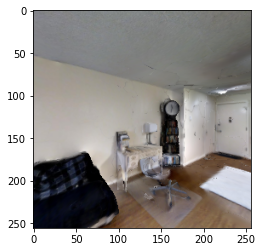

Waiting action from keyboard: arrows to move, "S" to stop


KeyboardInterrupt: 

In [4]:
runner = HabitatRunner()
successes = []
spls = []
for ep in runner.env._episodes:
    success, spl = runner.run_episode_interactive()
    successes.append(success)
    spls.append(spl)

In [7]:
print('Average success:', np.mean(successes))
print('Average SPL:', np.mean(spls))

Average success: 1.0
Average SPL: 0.8425420334102015
